In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# for number crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns

/kaggle/input/retail-transactions-dataset/Retail_Transactions_Dataset.csv


In [3]:
os.listdir('/kaggle/input/retail-transactions-dataset')

['Retail_Transactions_Dataset.csv']

In [4]:
data = pd.read_csv('/kaggle/input/retail-transactions-dataset/Retail_Transactions_Dataset.csv')

data.head(5)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [5]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


# Validating null columns

In [6]:
# Validating null values
data.isnull().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

# Transaction Data Distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Cost', ylabel='Percent'>

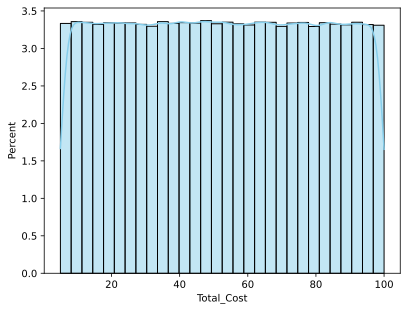

In [7]:
sns.histplot(data['Total_Cost'],bins=30, kde=True, color="skyblue", stat="percent")

In [9]:
# Distribution for Total_Cost
print(data['Total_Cost'].describe())

count    1000000.000000
mean          52.455220
std           27.416989
min            5.000000
25%           28.710000
50%           52.420000
75%           76.190000
max          100.000000
Name: Total_Cost, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Items', ylabel='Percent'>

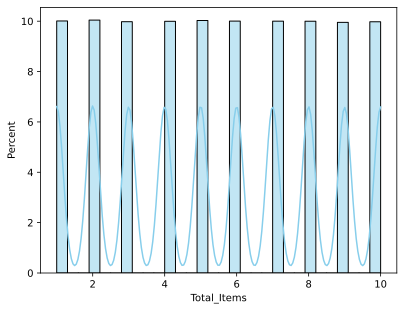

In [8]:
sns.histplot(data['Total_Items'],bins=30, kde=True, color="skyblue", stat="percent")

In [10]:
# Distribution for Total_Items
print(data['Total_Items'].describe())

count    1000000.000000
mean           5.495941
std            2.871654
min            1.000000
25%            3.000000
50%            5.000000
75%            8.000000
max           10.000000
Name: Total_Items, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

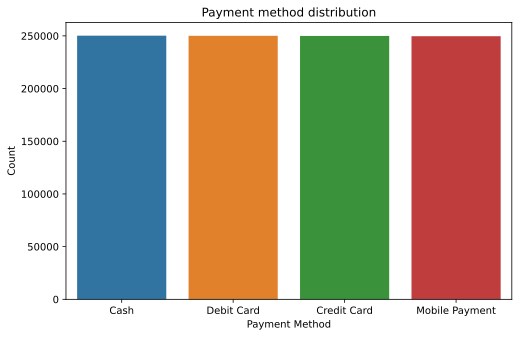

In [11]:
# Payment method distribution
plt.figure(figsize=(8, 5))
sns.countplot(data= data, x='Payment_Method', order=data['Payment_Method'].value_counts().index)
plt.title('Payment method distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show

In [13]:
# Distribution for Total_Items
print(data['Payment_Method'].describe())

count     1000000
unique          4
top          Cash
freq       250230
Name: Payment_Method, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

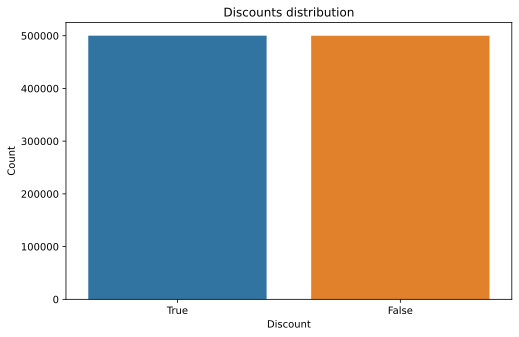

In [12]:
# Discounts distribution
plt.figure(figsize=(8, 5))
sns.countplot(data= data, x='Discount_Applied', order=data['Discount_Applied'].value_counts().index)
plt.title('Discounts distribution')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show

In [14]:
# Distribution for Total_Items
print(data['Discount_Applied'].describe())

count     1000000
unique          2
top          True
freq       500104
Name: Discount_Applied, dtype: object
